<a href="https://colab.research.google.com/github/RayOuKairui/Intro-to-Machine-Learning-Big-Data-and-Application-Capstone-Project/blob/main/Capstone_Project_Code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: adult income

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
np.set_printoptions(precision=3)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import csv
raw_dataset = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")



In [ ]:
dataset = raw_dataset.copy()
raw_dataset=(dataset[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP"]])
dataset = raw_dataset.copy()
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP
0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8
1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2
2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2
3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4
4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5
...,...,...,...,...,...,...,...,...,...
35059,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2
35060,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1
35061,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3
35062,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9


In [ ]:
np.shape(dataset)

(35064, 9)

In [ ]:
dataset.isna().sum()

PM2.5     616
PM10      429
SO2       474
NO2       659
CO       1753
O3       1173
TEMP       20
PRES       20
DEWP       20
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
train_dataset = dataset.sample(frac=0.75, random_state=2)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [ ]:
np.shape(train_features)

(24246, 9)

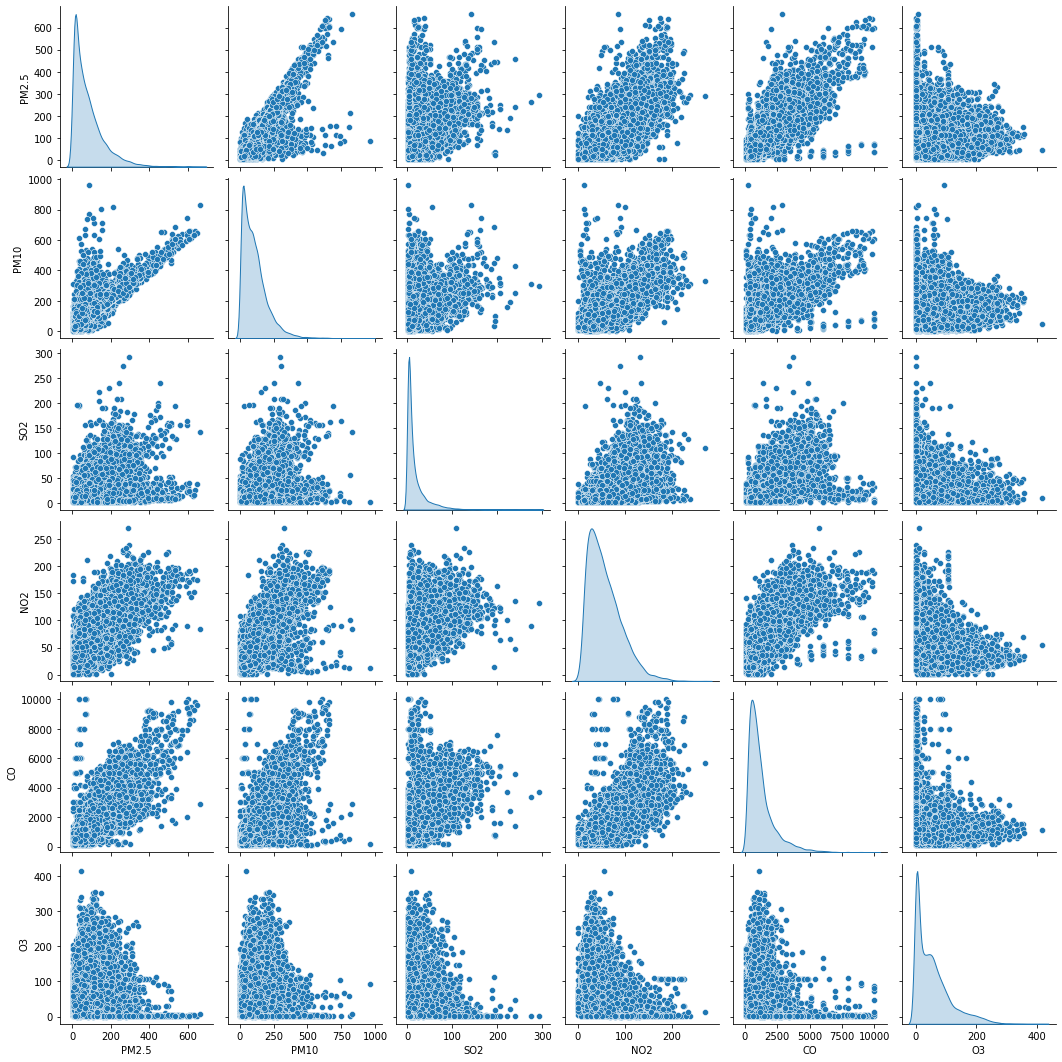

In [ ]:
sns.pairplot(train_dataset[['PM2.5', 'PM10', 'SO2', 'NO2','CO','O3']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,24246.0,82.826743,80.445298,3.0000,23.000,59.0,115.0,663.0
PM10,24246.0,108.741417,90.557795,2.0000,40.000,89.0,149.0,961.0
SO2,24246.0,17.264328,23.453966,1.0000,3.000,8.0,21.0,293.0
NO2,24246.0,57.659875,35.061570,2.0000,30.000,50.0,78.0,270.0
CO,24246.0,1262.648024,1149.547053,100.0000,500.000,900.0,1600.0,10000.0
O3,24246.0,55.938085,57.726155,0.2142,7.000,41.0,82.0,415.0
TEMP,24246.0,13.696243,11.439982,-16.8000,3.125,14.8,23.4,40.5
PRES,24246.0,1011.863667,10.460366,985.9000,1003.300,1011.2,1020.3,1042.0
DEWP,24246.0,3.218762,13.783571,-35.3000,-8.100,4.1,15.9,28.5


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('PM10')
test_labels = test_features.pop('PM10')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[  82.827   17.264   57.66  1262.648   55.938   13.696 1011.864    3.219]]


In [ ]:
first = np.array(train_features[:2])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 148.    13.    84.  1400.     2.    14.1 1011.9    3.5]
 [  19.     8.    66.   700.     8.     2.1 1029.6  -16.9]]

Normalized: [[ 0.81 -0.18  0.75  0.12 -0.93  0.04  0.    0.02]
 [-0.79 -0.4   0.24 -0.49 -0.83 -1.01  1.7  -1.46]]


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,                               #the preprocessing normalization layer (as variable)
      layers.Dense(1)
  ])

  model.compile(optimizer='adam',loss='mean_absolute_error', metrics=['accuracy'])
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer) #another hint: this 'normalizer' has 9 inputs
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0, validation_split=0.2
)

CPU times: user 1min 35s, sys: 7.34 s, total: 1min 43s
Wall time: 1min 28s


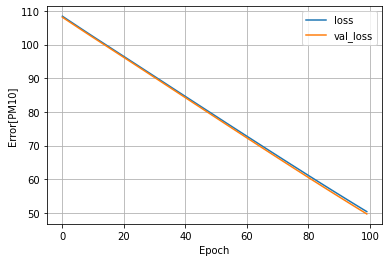

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss') #前一个history是变量！后一个history是历史记录！
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error[PM10]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
hist = pd.DataFrame(history.history) #前一个是model, 后一个history是历史记录 
hist['epoch'] = history.epoch  #标注epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,108.438812,0.0,108.138451,0.0,0
1,107.831459,0.0,107.532967,0.0,1
2,107.224594,0.0,106.927086,0.0,2
3,106.618027,0.0,106.321655,0.0,3
4,106.011597,0.0,105.716118,0.0,4
...,...,...,...,...,...
95,52.581745,0.0,51.908806,0.0,95
96,52.022568,0.0,51.345367,0.0,96
97,51.465809,0.0,50.783230,0.0,97
98,50.913815,0.0,50.225574,0.0,98


In [ ]:
test_predictions = dnn_model.predict(test_features)
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Vales [PM10]')
plt.ylabel('Predictions [PM10]')
lims = [0,1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)